                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  101
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -238.565
Date:                Fri, 11 Mar 2022   AIC                            497.130
Time:                        14:22:52   BIC                            523.281
Sample:                             0   HQIC                           507.717
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1291      0.076     67.529      0.000       4.980       5.278
ar.L1         -0.8098      0.141     -5.730      0.000      -1.087      -0.533
ar.L2          0.0457      0.177      0.258      0.7

array([ 0.        ,  3.88259569, -3.13966816,  1.42588851, -8.89196452,
        1.33523626,  0.72869386,  7.51929692, -2.61899143, -6.58975468,
       -0.2920044 ,  6.75399592,  1.96091032,  0.28147663,  1.18886809,
       -1.87538753, -2.17115173,  0.90549495, -0.76935256, -0.76117577,
       -1.28878028, -1.03754891,  4.83562586, -1.55507287,  2.32114743,
       -3.4331721 , -2.50586155,  1.30069787,  4.16381422, -2.78912683,
        2.89556239, -3.32935396, -2.73591696, -0.33228807, -1.28025087,
        5.64093613, -1.08292581, -0.63859915,  3.26303615, -2.23139658,
       -4.67505461,  6.75795058, -3.72976904,  1.62817162, -3.34393058,
        6.92368316, -4.78300932, -3.05354893, -0.12257692,  3.20474275,
        4.76683492, -1.12349091,  0.40132013, -6.44888448, -0.7326888 ,
        3.83330803,  3.83038018, -2.46432579, -3.78890805,  6.94441146,
       -6.55853962, -0.21726798,  1.46418871,  0.78865446,  3.62864463,
       -6.91405713,  6.41809904, -3.5068446 ,  2.46493055, -2.46

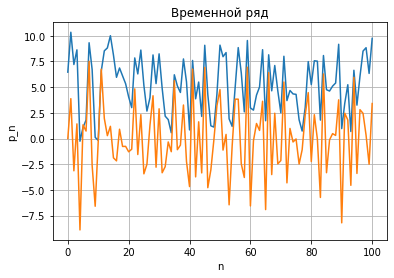

In [7]:
import numpy as np
# from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from math import sin
from random import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n_max = 102

# Задаем ряд
price_ser_src = pd.Series([sin(x) + 10*random() for x in range(1, n_max)])
# p_ser = price_ser_src[::5]

# Находим mu (тренд)
# Простой способ -- первая разность
mu_arr = np.array([price_ser_src[i]-price_ser_src[i-1] if i > 0 else 0. for i in range(len(price_ser_src)) ])

# Находим параметры ARMA (подгоняем модель)
model = ARIMA(price_ser_src, order=(4, 0, 4))
model_fit = model.fit()
print(model_fit.summary())

# make prediction -- это пока вообще не трогаем
# yhat = model_fit.predict(len(data), len(data))
# print(yhat)

# График
plt.title("Временной ряд") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(price_ser_src)
plt.plot(mu_arr)

# p_ser.reset_index(inplace=True, drop=True)
# p_ser

mu_arr


[100] [ 0.          3.88259569 -3.13966816  1.42588851 -8.89196452  1.33523626
  0.72869386  7.51929692 -2.61899143 -6.58975468 -0.2920044   6.75399592
  1.96091032  0.28147663  1.18886809 -1.87538753 -2.17115173  0.90549495
 -0.76935256 -0.76117577 -1.28878028 -1.03754891  4.83562586 -1.55507287
  2.32114743 -3.4331721  -2.50586155  1.30069787  4.16381422 -2.78912683
  2.89556239 -3.32935396 -2.73591696 -0.33228807 -1.28025087  5.64093613
 -1.08292581 -0.63859915  3.26303615 -2.23139658 -4.67505461  6.75795058
 -3.72976904  1.62817162 -3.34393058  6.92368316 -4.78300932 -3.05354893
 -0.12257692  3.20474275  4.76683492 -1.12349091  0.40132013 -6.44888448
 -0.7326888   3.83330803  3.83038018 -2.46432579 -3.78890805  6.94441146
 -6.55853962 -0.21726798  1.46418871  0.78865446  3.62864463 -6.91405713
  6.41809904 -3.5068446   2.46493055 -2.46313034 -2.13931165  5.5019884
 -4.31289645  0.98363228 -0.33528602 -0.04244913 -2.48007662 -1.09148249
  2.28839165  4.47077575 -2.23782926  2.321092

(array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
         -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
         -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
         -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
         -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
         -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
         -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
         -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
         -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
         -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
         -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
         -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
         -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
          0.50505051,   0.70707071,   0.90909091,   1.11111111,
          1.31313131,   1.51515152,   1.71717172,   1.91919192,
          2.12121212,   2.32323232,   2.

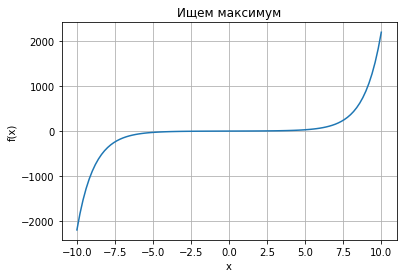

In [8]:
from scipy.optimize import minimize, minimize_scalar
import math
import functools


def math_exp(K: float, inv: float, mu: float, i: int):
    res = -inv/K * (math.exp(K*mu*i) + math.exp(-K*mu*i) - 2) 
    return res

def f(x):
    mu = 1
    t = 1
    return -1/x*(math.exp(x*mu*t) + math.exp(-x*mu*t) - 2)





# Считаем алгоритм

inv_0 = 100
inv_ser = [inv_0]

"""
for cnt, price in enumerate(price_ser_src):
    if cnt == 0:
        continue
    f = functools.partial(math_exp, inv = inv_ser[cnt-1], mu = mu[cnt-1], i=cnt-1)    
    K = minimize_scalar(f, bounds=(-1, 1), method='bounded', ).x
    inv_ser.append(K)
    
inv_ser
"""
print(inv_ser, mu_arr)


x_arr = np.linspace(-10, 10., 100)
f_arr = np.array([f(x_arr[i]) for i in range(len(x_arr))])



# f = functools.partial(math_exp, inv = 10, mu = 1, i=1)    
plt.title("Ищем максимум") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("f(x)") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(x_arr, -f_arr)

x_arr, f_arr









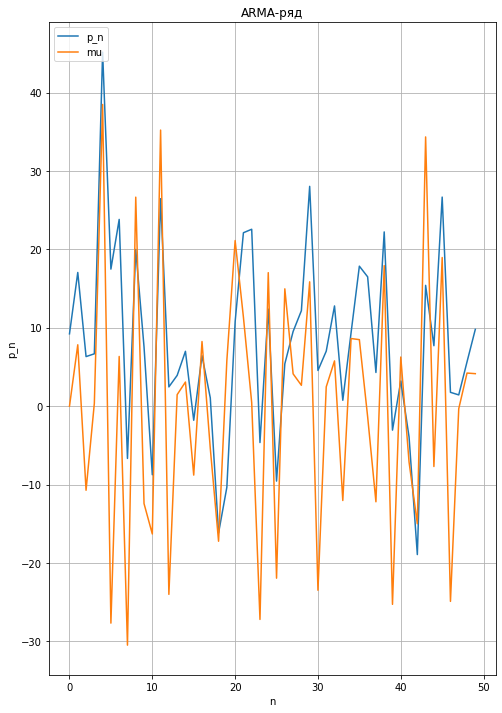

(array([  9.22789966,  17.05825146,   6.32364778,   6.67863964,
         45.17585964,  17.48652255,  23.82731666,  -6.67317886,
         19.99538794,   7.55766821,  -8.75468683,  26.47442503,
          2.45503491,   3.92130536,   6.99725647,  -1.80307657,
          6.44214869,   1.06064166, -16.18024989, -10.35803881,
         10.76977571,  22.12809165,  22.57224416,  -4.64487514,
         12.38754218,  -9.56717237,   5.40174372,   9.52364588,
         12.18324197,  28.04729369,   4.55270246,   7.01487651,
         12.78802162,   0.74751803,   9.37382697,  17.86102075,
         16.5019739 ,   4.29678748,  22.23254605,  -3.0603394 ,
          3.20652824,  -3.92719679, -18.94125033,  15.41420229,
          7.71171627,  26.67812815,   1.76315735,   1.43335701,
          5.65560783,   9.80022757]),
 array([  0.        ,   7.8303518 , -10.73460368,   0.35499186,
         38.49722   , -27.68933709,   6.34079411, -30.50049552,
         26.6685668 , -12.43771973, -16.31235504,  35.22911186,
  

In [38]:
# Генерируем и визуализируем ARMA(4,4)-ряд


import random

n_max = 50

a = [10., 8., 6., 2., .1]
d = [1., .6, .4, .1, .06]

p = [-1., 3., .1, -.8, .5]
for i in range(5, n_max+5):
    p_next = a[0]*p[4] + a[1]*p[3] + a[2]*p[2] + a[3]*p[1] + a[4]*p[0]
    xi = np.random.normal(0., 10., 5)
    p_next += sum([d[i]*xi[i] for i in range(5)])
    p.append(p_next)
    
p_arr = np.array(p[5:])
mu_arr = np.diff(p_arr)
# Сдвигаем разницу на одну единицу вперед (чтобы тренд был в конце интервала, а не в начале)
mu_arr = np.append(0., mu_arr)

n_lst = list(range(n_max))

figure = plt.figure(figsize=(8, 12))
plt.title("ARMA-ряд") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr, mu_arr)
plt.legend(['p_n', 'mu'], loc="upper left")

plt.show()
p_arr, mu_arr 


## Alg0 v.0.1 

Работает в двух модификациях: 

1) без добавления шума, когда g(t) = E_g(t), т.е. функция выигрыша равна своему матожиданию. В этом случае для положительных I_0, K всегда положительно или равно 0, и это чисто бычья стратегия. Для отрицательных I_0 K всегда отрицательно или равно 0, и это чисто медвежья стратегия. Т.е. нет смены знака по ходу выполнения алгоритма, каким бы ни был входной тренд.

2) к матожиданию процесса при вычислении функции g(t) мы добавляем нормальный белый шум N(0, 10). В этом случае появляется знакопеременность у K, и стратегия становится смешанной.


In [203]:
from math import fabs, exp
from scipy.optimize import minimize_scalar
import functools
import random


def minus_eg(k, _inv, _mu, _delta_t):
    """Функция Eg, которую мы максимизируем, взятая со знаком минус, потому что scipy.optimize ищет минимум."""
    res = -_mu*_inv/k*(math.exp(k*_mu*_delta_t) + math.exp(-k*_mu*_delta_t) - 2.)
    return res


def calc_alg0(p_arr, mu_arr, inv0):
    n_max = len(p_arr)-1
    # Ограничения на K
    k_min = -10
    k_max = 10
    # Массивы
    t_max = float(n_max) # /100
    t_arr = np.linspace(0., t_max, n_max + 1)
    
    
    
    
    #dt = t_arr[1]-t_arr[0]
    dt = 1
    
    
    
    k_arr = np.zeros(n_max+1)
    g_arr = np.zeros(n_max+1)
    inv_arr = np.zeros(n_max+1)
    inv_arr[0] = inv0    
    print('Starting alg0, I_0 = ', inv0)    
    # Задаем начальную инвестицию и профит
    """tm2, invm2, mum2, gm2, Km2,  = -2, inv_arr[0], 0., 0., 0.
    if Km2 > 0:
        desm2 = 'Buy'
    elif Km2 < 0:
        desm2 = 'Sell'
    else:
        desm2 = 'Nothing'
    print(f't={tm2}\t I={invm2}\t mu={mum2}\t g={gm2} \t K={Km2} -> {desm2}')
    
    tm1, invm1, Km1, gm1, mum1 = -1, inv_arr[0], 0., 0., 0.
    if Km1 > 0:
        desm1 = 'Buy'
    elif Km1 < 0:
        desm1 = 'Sell'
    else:
        desm1 = 'Nothing'
    print(f't={tm1}\t I={invm1}\t mu={mum1}\t g={gm1} \t K={Km1} -> {desm1}')
    """
    for i in range(1, n_max-1):
        des_str = ''
        if fabs(mu_arr[i]) <= 1:
            k_arr[i] = 0.
            g_arr[i] = 0.
            des_str = 'Nothing'
            inv_arr[i+1] = 0. 
        else:            
            mu_normalized = mu_arr[i]/10
            minus_eg_cur = functools.partial(minus_eg, _inv=inv_arr[i], _mu = mu_normalized, _delta_t=dt)
            
            
            
            """k_line = np.linspace(k_min, k_max, 100)
            f = np.array([minus_eg_cur(k)for k in k_line])
            plt.plot(k_line, f)
            plt.show()"""
            
            
            
            
            
            
            k_cur = minimize_scalar(minus_eg_cur, bounds=(k_min, k_max), method='bounded').x 
            k_arr[i] = k_cur
            g_arr[i] = fabs(p_arr[i] - p_arr[i-1])
            inv_arr[i+1] = inv_arr[i] + k_arr[i]*g_arr[i]
            if k_cur >= 0:
                des_str = 'Buy'
            else:
                des_str = 'Sell'    
            if 20 < i < 30 or i % 10 == 0:
                 print(f'iter={i}, t={round(t_arr[i], 2)}, I={round(inv_arr[i], 4)}, mu={round(mu_normalized, 4)}',
                       f'g={round(g_arr[i], 4)}, K={round(k_arr[i], 4)} -> {des_str}   I/K={round(inv_arr[i]/k_arr[i], 2)}')    
    k_ser = pd.Series(k_arr[:-2], index=t_arr[:-2])
    g_ser = pd.Series(g_arr[:-2], index=t_arr[:-2])
    inv_ser = pd.Series(inv_arr[:-2], index=t_arr[:-2])
    
    print(inv_arr)
    
    
    plt.figure(figsize=(20, 5))
    
    plt.subplot(131)
    plt.plot(k_ser[:n_max-2])
    plt.xlabel("t")
    plt.ylabel("K")
    plt.title("Gain coefficient")
    plt.grid() 

    plt.subplot(132)
    plt.plot(g_ser[:n_max-2], marker='o')
    plt.xlabel("t")
    plt.ylabel("g")
    plt.title("Profit")
    plt.grid() 
    
    plt.subplot(133)
    plt.plot(inv_ser[:n_max-2], marker='o')
    plt.xlabel("t")
    plt.ylabel("I")
    plt.title("Investment")
    plt.grid() 
    
    plt.show()
    
    
    figure = plt.figure(figsize=(4, 6))
    plt.title("Decision -- zoomed") # заголовок
    plt.xlabel("n") # ось абсцисс
    plt.ylabel("K_n") # ось ординат
    plt.grid()      # включение отображение сетки
    # plt.plot(p_ser)  # построение графика
    plt.plot(n_lst[90:101], k_arr[90:101])
    plt.plot(n_lst[90:101], p_arr[90:101])
    plt.legend(['k_arr','p_n'], loc="upper left")
    

"""
# Три разных случая
# 1. I_0 > 0, g(t) = Eg(t) -> I_0 = 10, xi = 0
print('1. I_0 > 0, g(t) = Eg(t) -> I_0 = 10, xi = 0:')
calc_alg0(p_arr, mu_arr, 10)
print('='*10)
print()
print()

# 2. I_0 < 0, g(t) = Eg(t) -> I_0 = -10, xi = 0
print('2. I_0 < 0, g(t) = Eg(t) -> I_0 = -10, xi = 0:')
calc_alg0(p_arr, mu_arr, -10)
print('='*10)
print()
print()

# 3. I_0 любое, g(t) = Eg(t) + xi(t) (белый шум) -> I_0 = 10, xi_noise = 10, lambda: .1*np.random.normal(0, 1)    
print('3. I_0=10, g(t) = Eg(t) + xi(t) (белый шум) -> I_0 = 10, xi_noise -- белый шум 0.1*N(0,1):')
xi_noise = lambda: .1*np.random.normal(0, 1)  
calc_alg0(p_arr, mu_arr, 10, xi_noise)    
print('='*10)
print()
print()
"""


"\n# Три разных случая\n# 1. I_0 > 0, g(t) = Eg(t) -> I_0 = 10, xi = 0\nprint('1. I_0 > 0, g(t) = Eg(t) -> I_0 = 10, xi = 0:')\ncalc_alg0(p_arr, mu_arr, 10)\nprint('='*10)\nprint()\nprint()\n\n# 2. I_0 < 0, g(t) = Eg(t) -> I_0 = -10, xi = 0\nprint('2. I_0 < 0, g(t) = Eg(t) -> I_0 = -10, xi = 0:')\ncalc_alg0(p_arr, mu_arr, -10)\nprint('='*10)\nprint()\nprint()\n\n# 3. I_0 любое, g(t) = Eg(t) + xi(t) (белый шум) -> I_0 = 10, xi_noise = 10, lambda: .1*np.random.normal(0, 1)    \nprint('3. I_0=10, g(t) = Eg(t) + xi(t) (белый шум) -> I_0 = 10, xi_noise -- белый шум 0.1*N(0,1):')\nxi_noise = lambda: .1*np.random.normal(0, 1)  \ncalc_alg0(p_arr, mu_arr, 10, xi_noise)    \nprint('='*10)\nprint()\nprint()\n"

### Теперь готовим реальные данные

<Figure size 576x864 with 0 Axes>

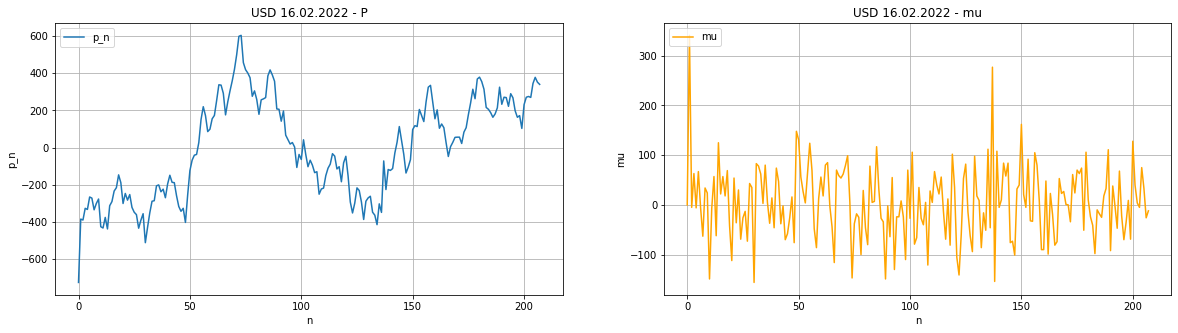

(-726.0262195186515,
 array([-726.02621952, -385.02621952, -390.02621952, -327.02621952,
        -333.02621952, -266.02621952, -272.02621952, -335.02621952,
        -301.02621952, -277.02621952, -426.02621952, -433.02621952,
        -376.02621952, -438.02621952, -313.02621952, -291.02621952,
        -234.02621952, -216.02621952, -147.02621952, -189.02621952,
        -301.02621952, -247.02621952, -283.02621952, -253.02621952,
        -322.02621952, -348.02621952, -361.02621952, -434.02621952,
        -391.02621952, -356.02621952, -512.02621952, -429.02621952,
        -351.02621952, -289.02621952, -286.02621952, -206.02621952,
        -201.02621952, -238.02621952, -224.02621952, -270.02621952,
        -196.02621952, -149.02621952, -187.02621952, -189.02621952,
        -259.02621952, -317.02621952, -343.02621952, -327.02621952,
        -403.02621952, -255.02621952, -124.02621952,  -68.02621952,
         -41.02621952,  -37.02621952,   26.97378048,  150.97378048,
         219.97378048,  171

In [205]:
col_names = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7']
df = pd.read_csv('trades-17-02-22.csv', sep=';', names=col_names)
col3_ser = df['col3']
col3_ser.reset_index(drop=True, inplace=True)

price_series=np.array(col3_ser)
price_series, len(price_series)
p_arr = np.array([price_series[i] - np.mean(price_series) for i in range(len(price_series)) if i % 5000 == 0 ])
p_init = price_series[0] - np.mean(price_series)
mu_arr = np.diff(p_arr)
# Сдвигаем разницу на одну единицу вперед (чтобы тренд был в конце интервала, а не в начале)
mu_arr = np.append(0., mu_arr)

n_lst = list(range(len(p_arr)))

figure = plt.figure(figsize=(8, 12))
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.title("USD 16.02.2022 - P") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr)
plt.legend(['p_n'], loc="upper left")

plt.subplot(122)
plt.title("USD 16.02.2022 - mu") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("mu") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(n_lst, mu_arr, color='orange')
plt.legend(['mu'], loc="upper left")

plt.show()




p_init, p_arr, mu_arr 


Starting alg0, I_0 =  1
iter=10, t=10.0, I=4489.997, mu=-14.9 g=149.0, K=-10.0 -> Sell   I/K=-449.0
iter=20, t=20.0, I=5369.9964, mu=-11.2 g=112.0, K=-10.0 -> Sell   I/K=-537.0
iter=21, t=21.0, I=4249.9972, mu=5.4 g=54.0, K=10.0 -> Buy   I/K=425.0
iter=22, t=22.0, I=4789.9968, mu=-3.6 g=36.0, K=-10.0 -> Sell   I/K=-479.0
iter=23, t=23.0, I=4429.9971, mu=3.0 g=30.0, K=10.0 -> Buy   I/K=443.0
iter=24, t=24.0, I=4729.9969, mu=-6.9 g=69.0, K=-10.0 -> Sell   I/K=-473.0
iter=25, t=25.0, I=4039.9973, mu=-2.6 g=26.0, K=-10.0 -> Sell   I/K=-404.0
iter=26, t=26.0, I=3779.9975, mu=-1.3 g=13.0, K=-10.0 -> Sell   I/K=-378.0
iter=27, t=27.0, I=3649.9976, mu=-7.3 g=73.0, K=-10.0 -> Sell   I/K=-365.0
iter=28, t=28.0, I=2919.9981, mu=4.3 g=43.0, K=10.0 -> Buy   I/K=292.0
iter=29, t=29.0, I=3349.9978, mu=3.5 g=35.0, K=10.0 -> Buy   I/K=335.0
iter=30, t=30.0, I=3699.9975, mu=-15.6 g=156.0, K=-10.0 -> Sell   I/K=-370.0
iter=40, t=40.0, I=4559.997, mu=7.4 g=74.0, K=10.0 -> Buy   I/K=456.0
iter=50, t=50.0, 

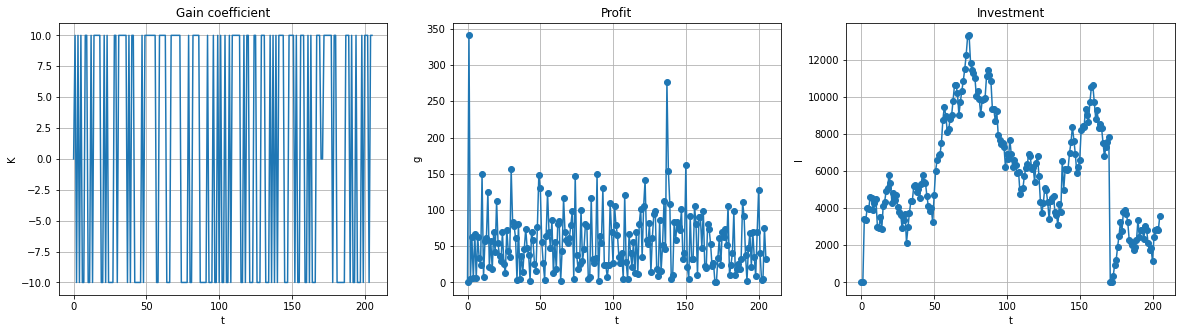

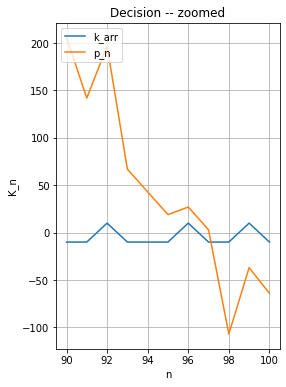

In [206]:
i0 = 1
# xi_noise = lambda: -10.*np.random.normal(0, 20)  
calc_alg0(p_arr, mu_arr, i0)   
